In [1]:
%config InlineBackend.figure_format = 'retina'
%pylab inline
### Libraries 
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(1, '../codes/')
from myUtils import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
############## Load city file ####################
dfc = gpd.read_file('../data_revision/cities/all/gdfCities.shp')
fs = 16
fs1 = 14

# Figure Rev 1

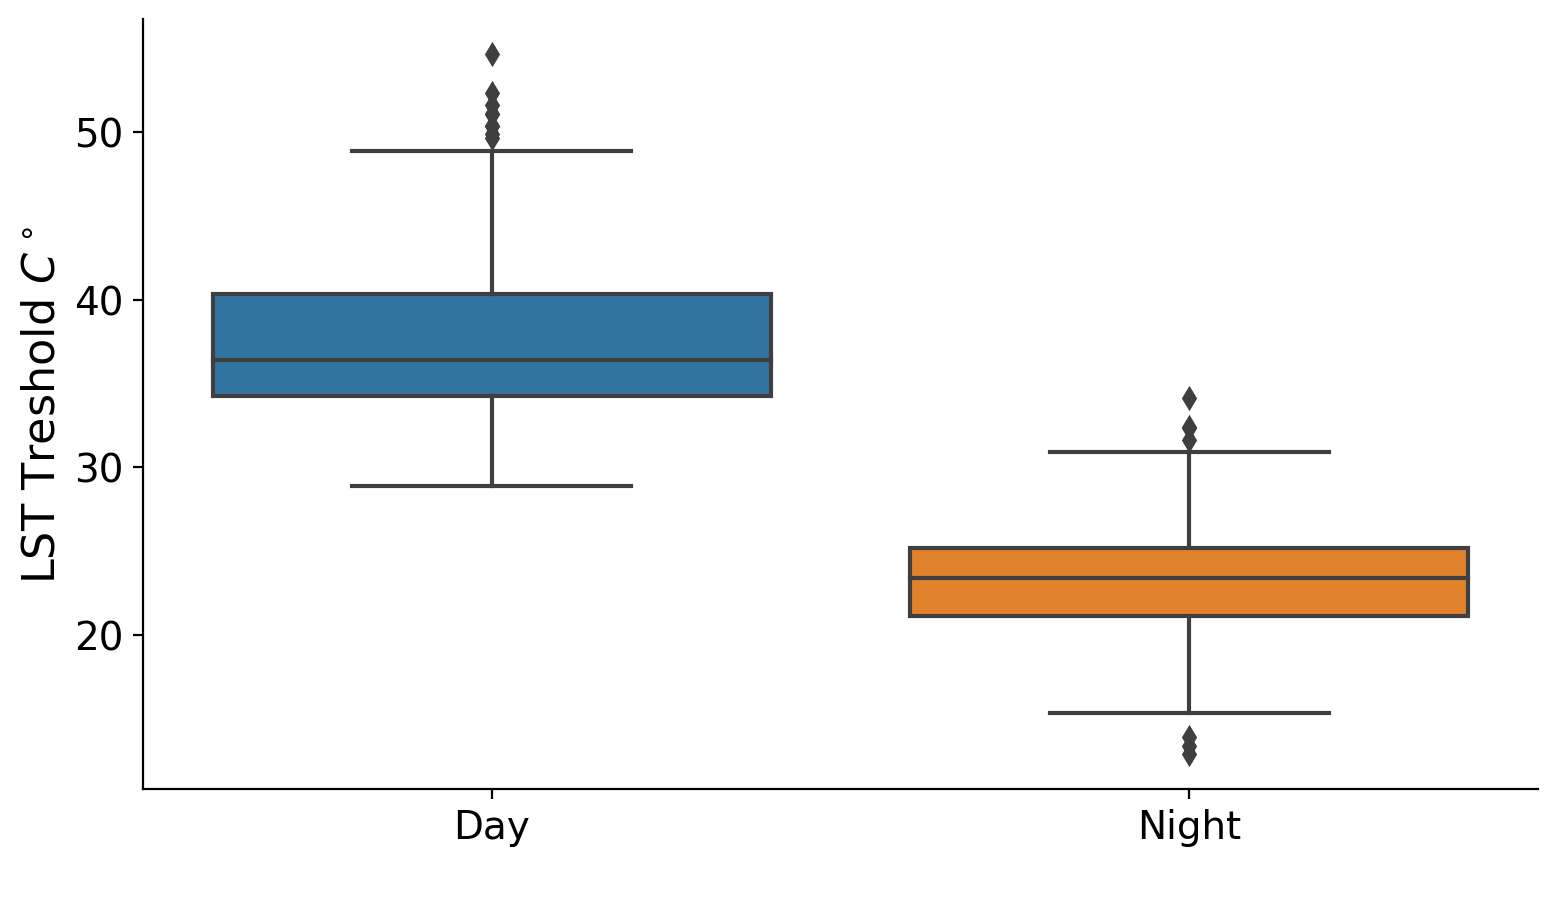

In [3]:
#### Load dataset tresholds
dfTreshold = pd.read_csv('../data_revision/dfTreshold3.csv')
df = dfTreshold[['Tr_day3', 'Tr_night3']]
df.columns = ['Day', 'Night']

f,ax=plt.subplots(figsize=(9,5))
ax = setFont(ax, 'DejaVu Sans', fs1)
sns.boxplot(x="variable", y="value", data=pd.melt(df));
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_ylabel('LST Treshold '+r'$C^\circ$', size=fs)
ax.set_xlabel(' ');

In [67]:
f.savefig('../figures_revision/daynightThreshold.pdf', bbox_inches = 'tight')

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs('+proj=wintri') 
dfcc = dfc.to_crs('+proj=wintri') 

# Figure Rev 2

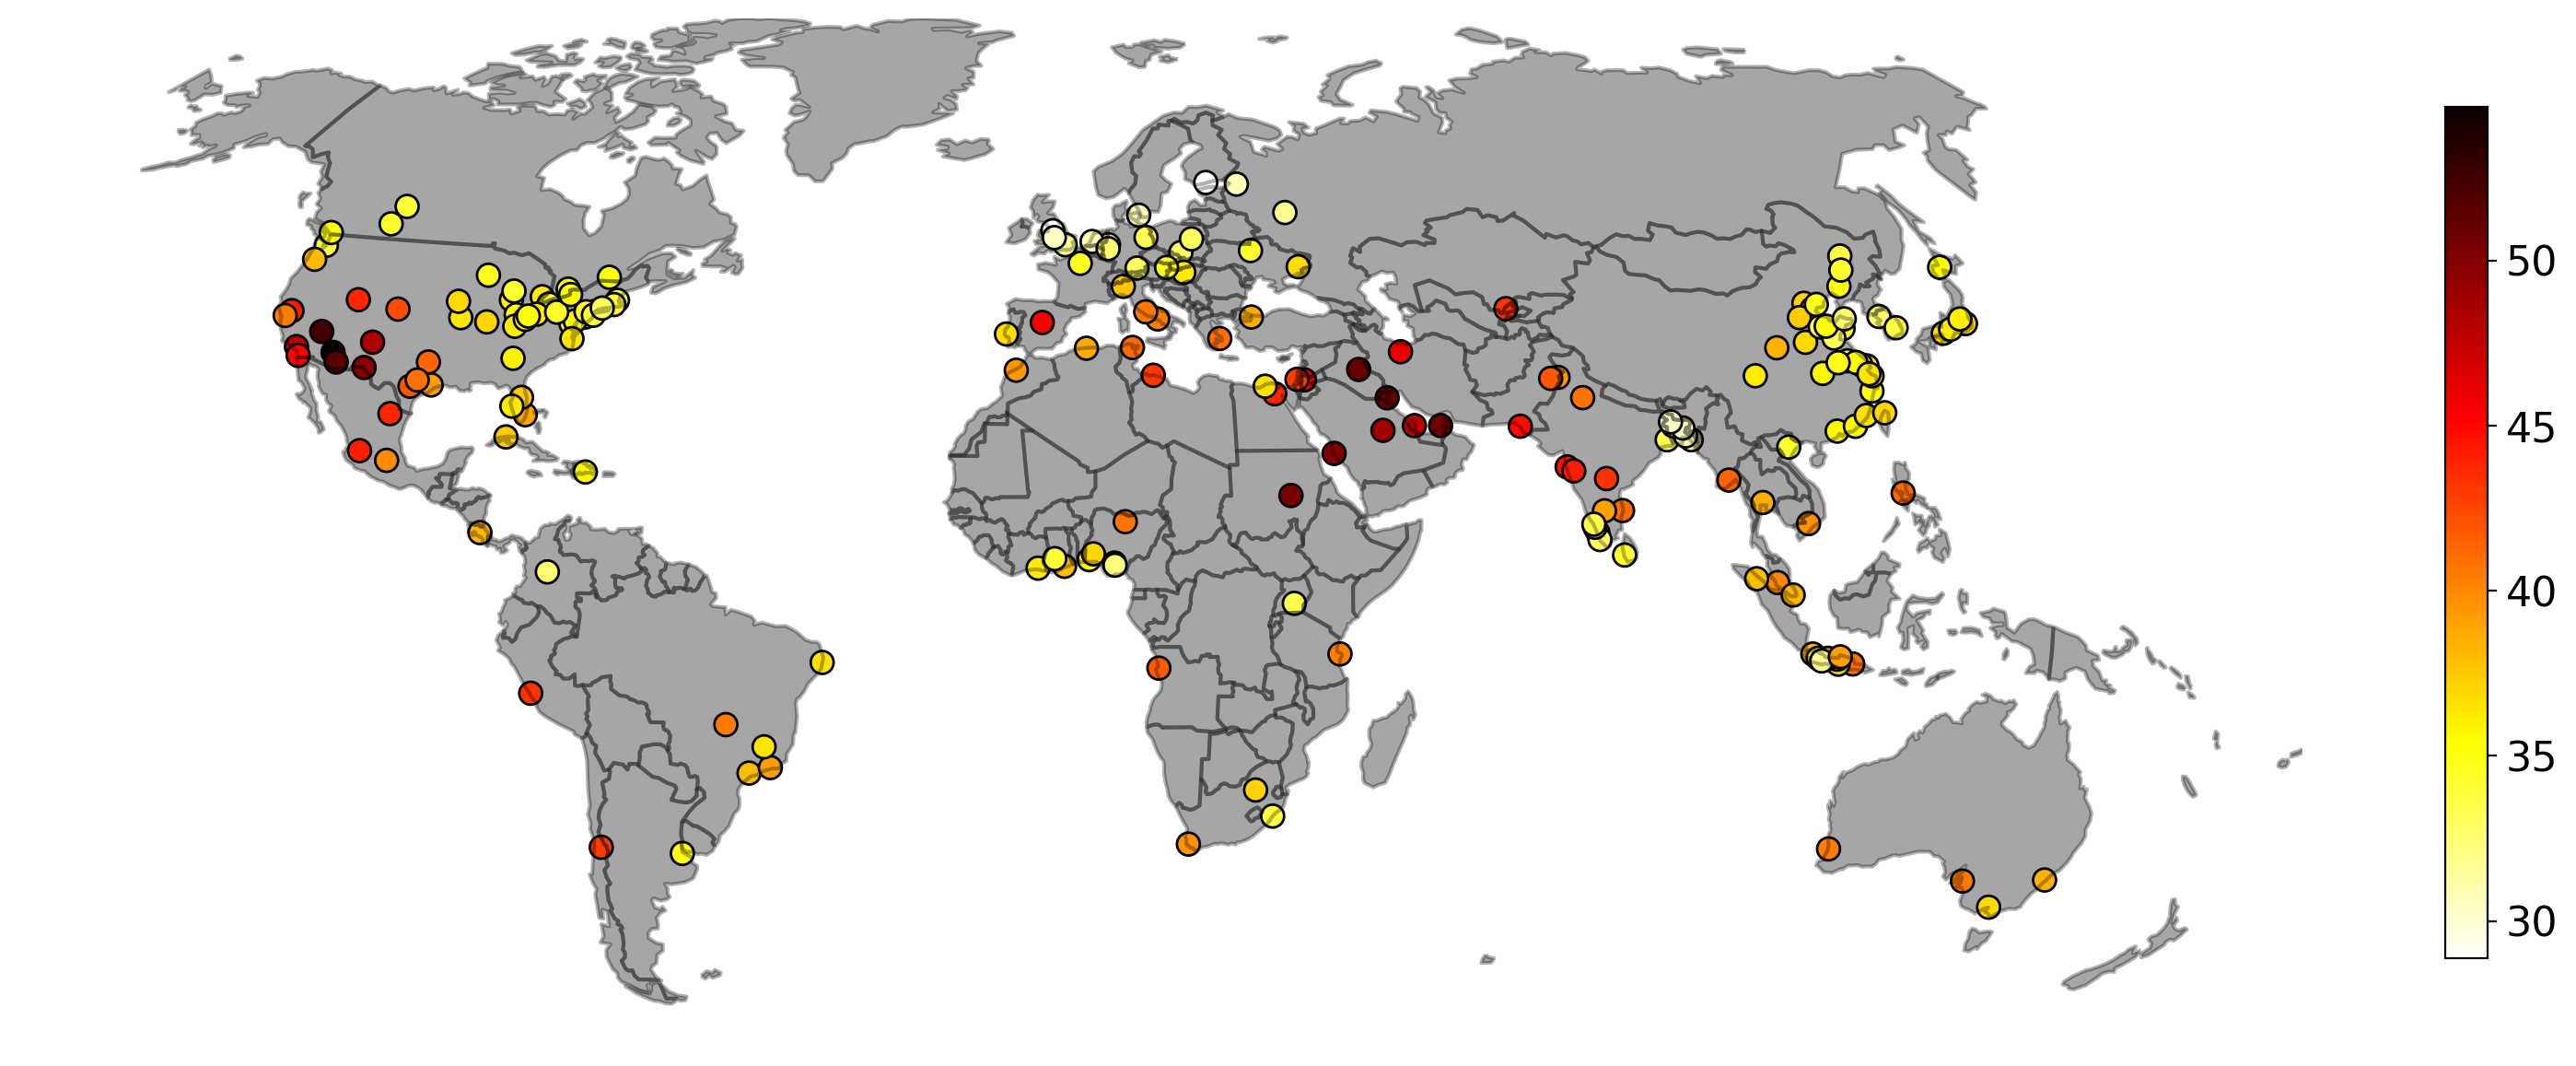

In [5]:
DFC = pd.DataFrame()
DFC['X']=dfcc['geometry'].centroid.x
DFC['Y']=dfcc['geometry'].centroid.y
DFC['tresholdDay'] = dfTreshold['Tr_day3']
DFC['tresholdNight'] = dfTreshold['Tr_night3']
gdf = gpd.GeoDataFrame(DFC, geometry=gpd.points_from_xy(DFC.X, DFC.Y))

f,ax = plt.subplots(figsize=(20,20))
world.plot(ax=ax, color='gray', alpha=0.7)
world.boundary.plot(ax=ax, color='black', alpha=0.3)
gdf.plot(column='tresholdDay', ax=ax, legend=True, 
         legend_kwds={'shrink': 0.3}, 
         cmap='hot_r',
         edgecolor="black", 
         markersize=40*2)


ax.set_xlim([-16646156, 19646156]);
ax.set_ylim([-7018754, 9328438]);
cb_ax = f.axes[1] 
cb_ax.tick_params(labelsize=fs);
ax.axis('off');

In [63]:
f.savefig('../figures_revision/dailyThreshold.pdf', bbox_inches = 'tight')

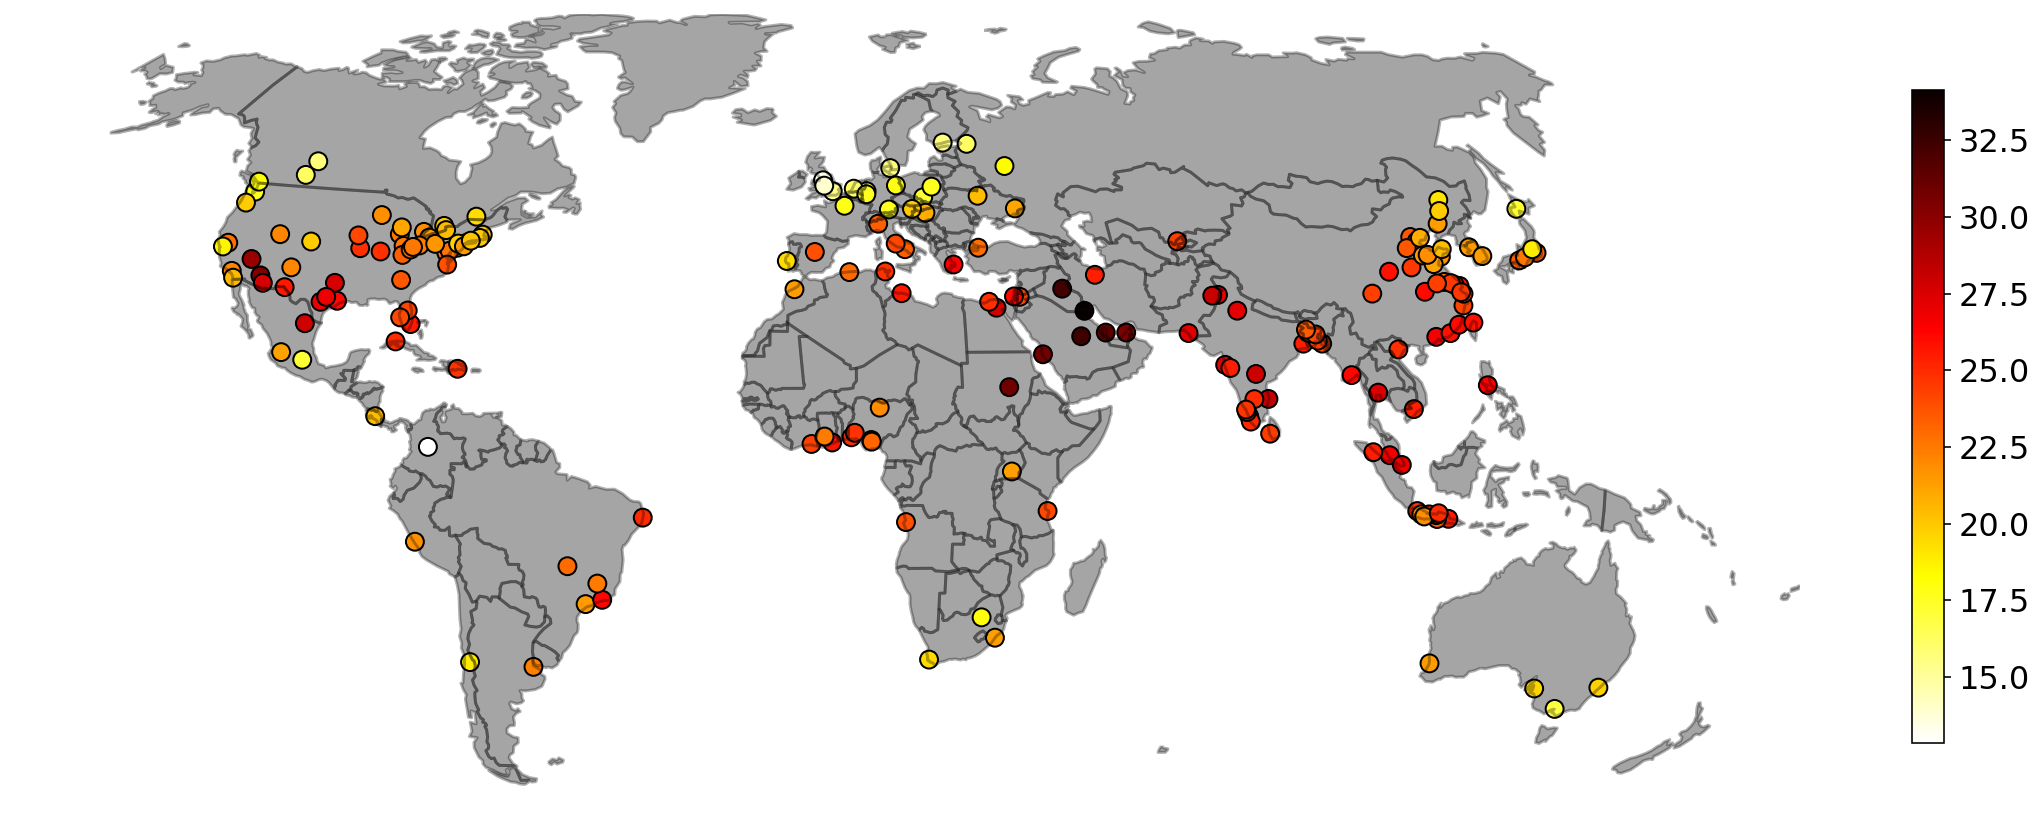

In [6]:
f,ax = plt.subplots(figsize=(20,20))
world.plot(ax=ax, color='gray', alpha=0.7)
world.boundary.plot(ax=ax, color='black', alpha=0.3)
gdf.plot(column='tresholdNight', ax=ax, legend=True, 
         legend_kwds={'shrink': 0.3}, 
         cmap='hot_r',
         edgecolor="black", 
         markersize=40*2)


ax.set_xlim([-16646156, 19646156]);
ax.set_ylim([-7018754, 9328438]);
cb_ax = f.axes[1] 
cb_ax.tick_params(labelsize=fs);
ax.axis('off');

In [65]:
f.savefig('../figures_revision/nightThreshold.pdf', bbox_inches = 'tight')

# Figure Rev 3

In [7]:
sys.path.insert(1, '../codes/')
from geeCodes import *
dfc = dfc.to_crs('EPSG:4326')
geo = dfc[dfc['UC_NM_MN']=='Paris'].reset_index(drop=True)
S = returnCityBoundary(geo)

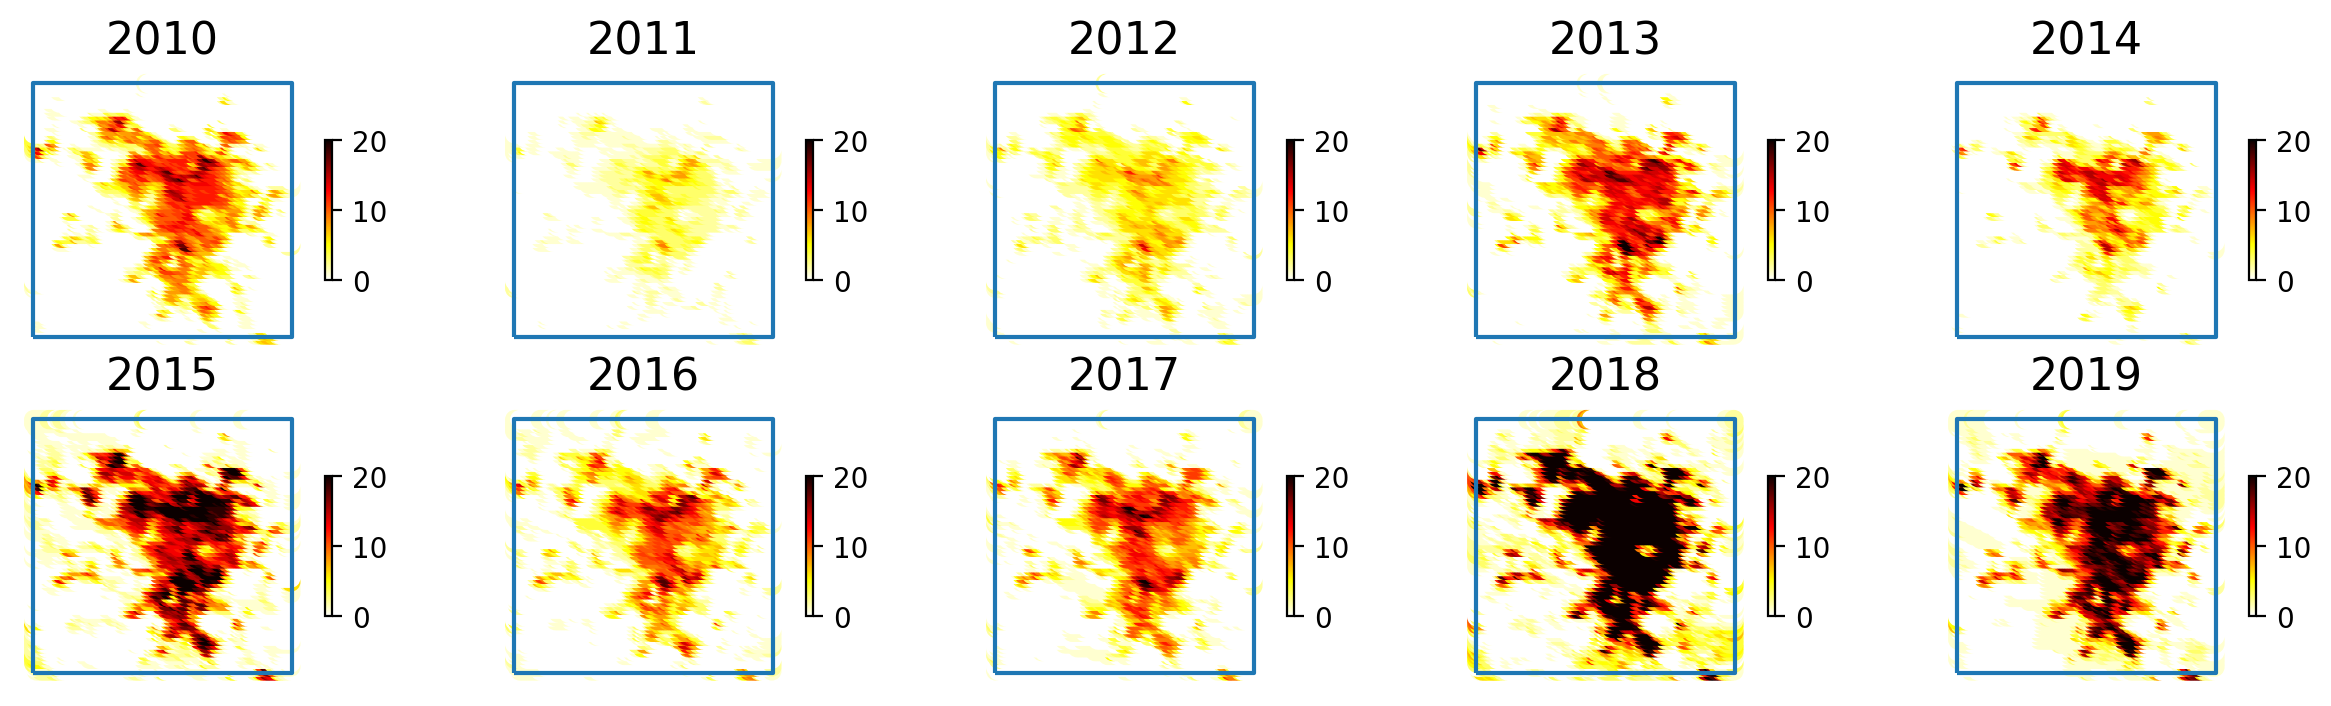

In [8]:
years = np.arange(2010, 2020)
f,axs = plt.subplots(2,5, figsize=(15, 4))
i=j=0
for year in years:
    ax = axs[i][j]
    gdf = gpd.read_file('../data_revision/exposure/gdf_paris_%d.shp'%year)
    gdf.plot(column='hot_days', legend=True, vmax=20, ax=ax,legend_kwds={'shrink': 0.5} , cmap='hot_r')
    ax.axis('off')
    ax.set_title('%d'%year, size=fs)
    cb_ax = f.axes[1] 
    cb_ax.tick_params(labelsize=fs1);
    S[0].boundary.plot(ax=ax)
    
    j+=1
    if j==5:
        j=0
        i+=1

In [38]:
f.savefig('../figures_revision/parisDay.pdf', bbox_inches = 'tight')

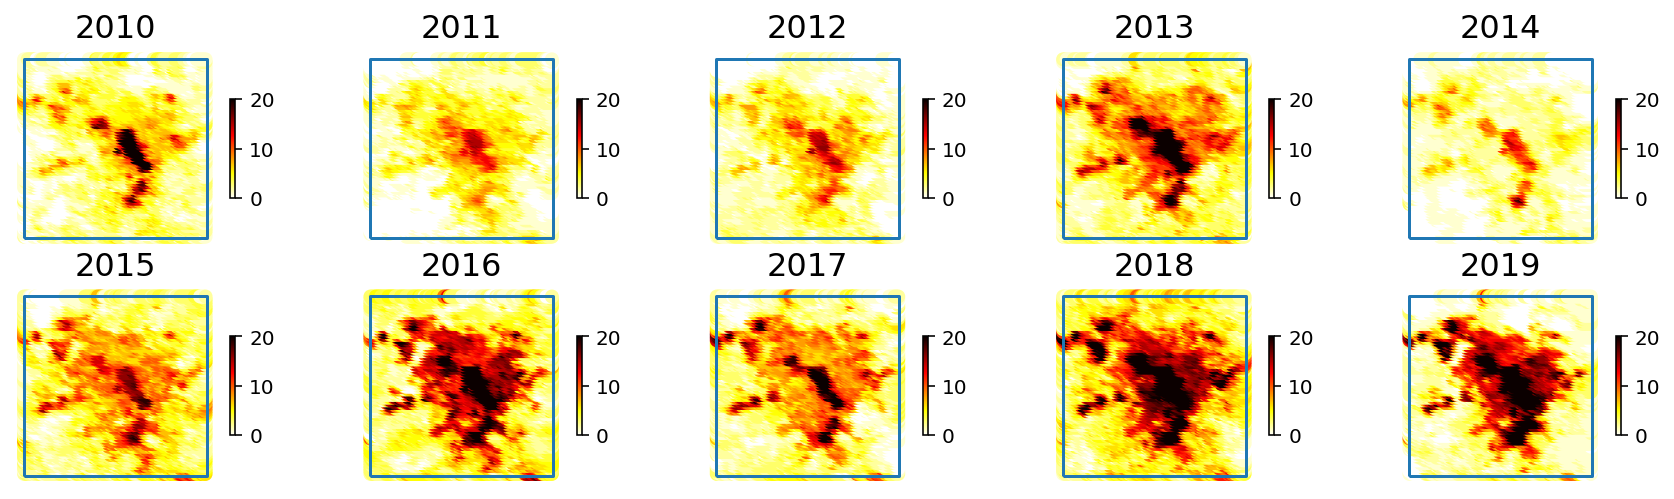

In [40]:
f,axs = plt.subplots(2,5, figsize=(15, 4))
i=j=0
for year in years:
    ax = axs[i][j]
    gdf = gpd.read_file('../data_revision/exposure/gdf_paris_%d.shp'%year)
    gdf.plot(column='hot_nights', legend=True, vmax=20, ax=ax,legend_kwds={'shrink': 0.5} , cmap='hot_r')
    ax.axis('off')
    ax.set_title('%d'%year, size=fs)
    cb_ax = f.axes[1] 
    cb_ax.tick_params(labelsize=fs1);
    S[0].boundary.plot(ax=ax)
    
    j+=1
    if j==5:
        j=0
        i+=1

In [41]:
f.savefig('../figures_revision/parisNight.pdf', bbox_inches = 'tight')

# Figure Rev 4

In [9]:
cols=['year', 'ep', 'days', 'nights', 'pop', 'epdays', 'epnights']
dfYears = pd.DataFrame(columns=cols)
for year in years:
    gdf = gpd.read_file('../data_revision/exposure/gdf_paris_%d.shp'%year)
    epdays = np.sum(gdf['hot_days']*gdf['pop'])
    epnights = np.sum(gdf['hot_nights']*gdf['pop'])
                
    ep = (epdays+epnights)/2
    
    
    data = [year, ep, gdf['hot_days'].mean(), gdf['hot_nights'].mean(), gdf['pop'].sum(), epdays, epnights]
    
    dfYears = dfYears.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)

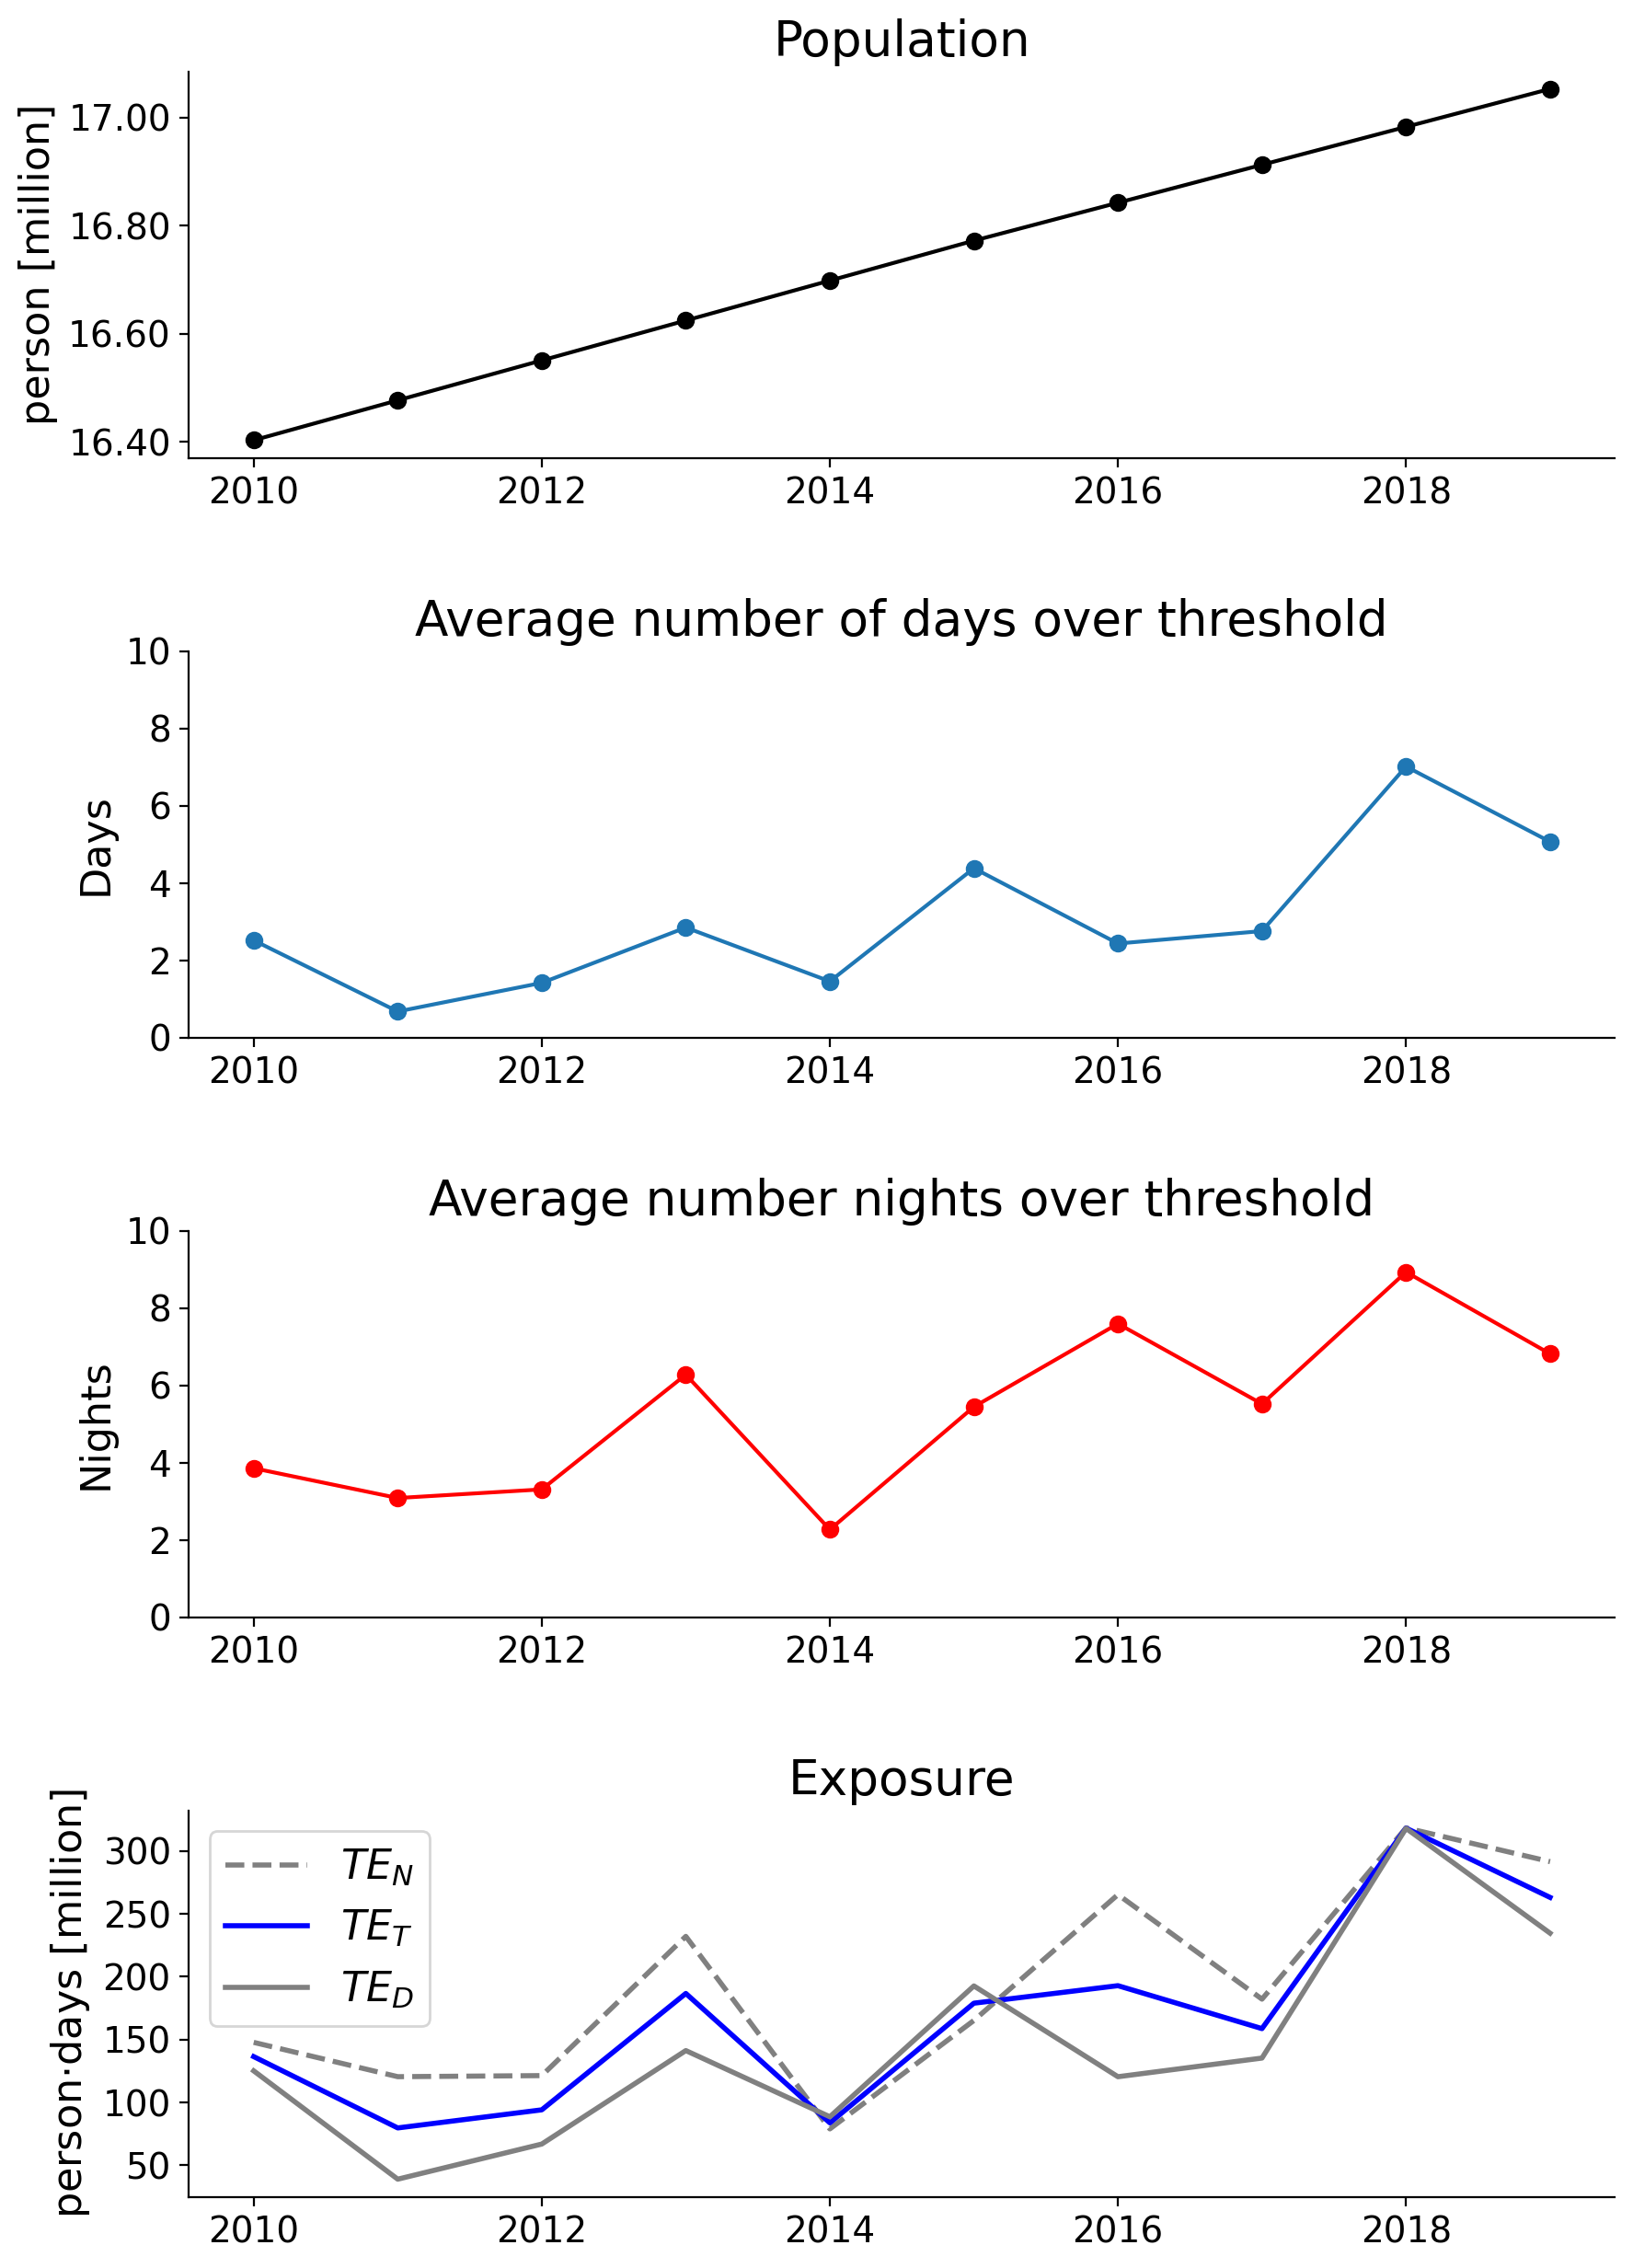

In [10]:

def millions1(x, pos):
    'The two args are the value and tick position'
    return '%.2f' % (x * 1e-6)




f,axs=plt.subplots(4,1, figsize=(10,15))
ax=axs[0]
ax = setFont(ax, 'DejaVu Sans', fs1)
ax.plot(dfYears['year'], dfYears['pop'], color='black', marker='o')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
formatter = FuncFormatter(millions1)
ax.yaxis.set_major_formatter(formatter)


ax.set_ylabel('person [million]', size=fs)
ax.set_title('Population', size=fs*1.2);

ax=axs[1]
ax = setFont(ax, 'DejaVu Sans', fs1)
ax.plot(dfYears['year'], dfYears['days'], marker='o')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_title('Average number of days over threshold', size=fs*1.2);
ax.set_ylabel('Days', size=fs)
ax.set_ylim([0, 10])


ax=axs[2]
ax = setFont(ax, 'DejaVu Sans', fs1)
ax.plot(dfYears['year'], dfYears['nights'], color='red', marker='o')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_title('Average number nights over threshold', size=fs*1.2);
ax.set_ylabel('Nights', size=fs)
ax.set_ylim([0, 10])


ax=axs[3]
ax = setFont(ax, 'DejaVu Sans', fs1)
ax.plot(dfYears['year'], dfYears['epnights'], lw=2, color='gray', ls='--', label = r'$TE_N$')
ax.plot(dfYears['year'], dfYears['ep'], lw=2, color='blue',  label = r'$TE_T$')
ax.plot(dfYears['year'], dfYears['epdays'], lw=2, color='gray',  label = r'$TE_D$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_title('Exposure', size=fs*1.2);
ax.set_ylabel('person'+r'$\cdot$'+'days [million]', size=fs)
ax.legend(fontsize=fs)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

f.subplots_adjust(hspace=0.5)

In [11]:
f.savefig('../figures_revision/parisExposureSI.pdf', bbox_inches = 'tight')

# Figure Rev 5

In [12]:
idx = np.arange(0,200)
gdf_all = pd.DataFrame()
for ii in idx:
    gdf = gpd.read_file('../data_revision/GEE_dataframes/gdf_%d.shp'%ii)
    gdf =  gdf.set_crs('epsg:4326')
    gdf = gdf.to_crs("ESRI:54009")
    gdf['dist'] = -gdf['dist']
    gdf = gdf[gdf['dist']>0]
    gdf['dist_n'] = 1/(gdf['dist']**2)
    gdf['dist_n'] = norm01(gdf, 'dist_n')
    gdf = gdf[gdf['NDVI']>=-1]
    gdf = gdf[gdf['NDBI']>=-1].reset_index(drop=True)
    gdf['hot_days']=gdf['hot_days']/11
    gdf['hot_nights']=gdf['hot_nights']/11
    gdf['average_days'] = np.mean(gdf['hot_days'])
    gdf['average_nights'] = np.mean(gdf['hot_nights'])
    
    gdf_all = gdf_all.append(gdf, ignore_index=True)

In [7]:
gdf_all_ = gdf_all[['hot_days','hot_nights', 'NDVI', 'NDBI', 'dist_n']]

<AxesSubplot:>

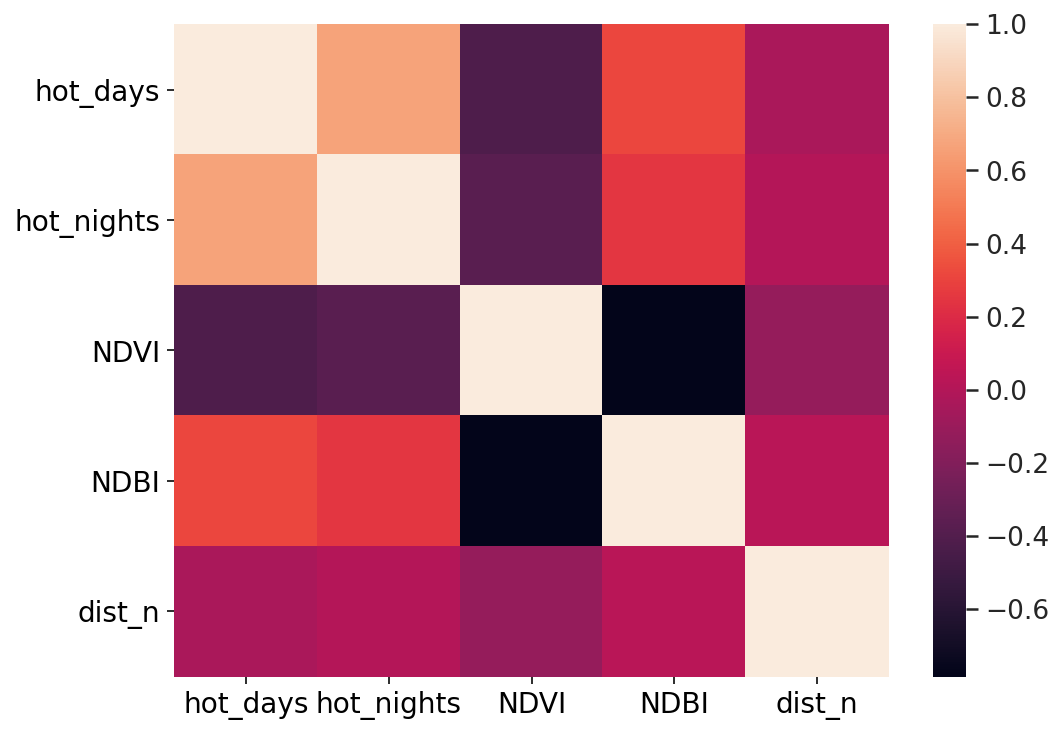

In [10]:
f,ax=plt.subplots(figsize=(8,6))
ax = setFont(ax, 'DejaVu Sans', fs1)
sns.set(font_scale=1.2)
sns.heatmap(gdf_all_.corr(), ax=ax)

In [69]:
f.savefig('../figures_revision/correlations.pdf', bbox_inches = 'tight')

In [11]:
gdf_all_.corr()

,hot_days,hot_nights,NDVI,NDBI,dist_n
hot_days,1.000000,0.665792,-0.419391,0.312625,-0.034275
hot_nights,0.665792,1.000000,-0.370339,0.248157,0.004655
NDVI,-0.419391,-0.370339,1.000000,-0.785032,-0.120981
NDBI,0.312625,0.248157,-0.785032,1.000000,0.025186
dist_n,-0.034275,0.004655,-0.120981,0.025186,1.000000


In [72]:
print(gdf_all_.corr().to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  hot\_days &  hot\_nights &      NDVI &      NDBI &    dist\_n \\
\midrule
hot\_days   &  1.000000 &    0.665792 & -0.419391 &  0.312625 & -0.034275 \\
hot\_nights &  0.665792 &    1.000000 & -0.370339 &  0.248157 &  0.004655 \\
NDVI       & -0.419391 &   -0.370339 &  1.000000 & -0.785032 & -0.120981 \\
NDBI       &  0.312625 &    0.248157 & -0.785032 &  1.000000 &  0.025186 \\
dist\_n     & -0.034275 &    0.004655 & -0.120981 &  0.025186 &  1.000000 \\
\bottomrule
\end{tabular}



# Figure Rev 6

In [8]:
######### Load datasets for cross validation
dfTV = pd.read_pickle('../data_revision/cities/cv/df_train_val.pkl')
dfTest = pd.read_pickle('../data_revision/cities/cv/df_test.pkl')
dfc = gpd.read_file('../data_revision/cities/all/gdfCities.shp')

In [9]:
def valSet(gdfF, cc, XVars, Yvars):
    gdf_val = gdfF[gdfF['city'].isin(cc)].reset_index(drop=True)    
    y_day_val = gdf_val[Yvars[0]].values.reshape(-1, 1)
    y_night_val= gdf_val[Yvars[1]].values.reshape(-1, 1)
    x_val = gdf_val[XVars].values
    w_day_val   = libpysal.weights.lag_spatial(w_val, y_day_val)
    w_night_val = libpysal.weights.lag_spatial(w_val, y_night_val)
    return w_day_val, w_night_val, x_val, y_day_val, y_night_val


def trainSet(gdfF, cc, XVars, Yvars):
    gdf_train = gdfF[~gdfF['city'].isin(cc)].reset_index(drop=True)
    w_train = libpysal.weights.KNN.from_dataframe(gdf_train, k=8)
    w_train.transform = 'r'
    x_train = gdf_train[XVars].values
    y_day_train = gdf_train[Yvars[0]].values.reshape(-1, 1)
    y_night_train = gdf_train[Yvars[1]].values.reshape(-1, 1)
    return w_train, x_train, y_day_train, y_night_train

def run_model_validation_s(x_, w, model):
    val = sm.add_constant(np.hstack((x_, np.array(w).reshape(-1, 1))))
    return np.sum(val * model.betas.T, axis=1).reshape((-1, 1))

def run_model_validation_o(x_, model):
    val = sm.add_constant(x_)
    return np.sum(val* model.betas.T, axis=1).reshape((-1, 1))



from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [10]:
target_vars = ['hot_days', 'hot_nights']
predictor_vars_ok = ['NDVI', 'dist_n']
predictor_vars = ['NDBI', 'NDVI', 'dist_n']
predictor_vars_days = ['average_days', 'NDVI', 'dist_n']
predictor_vars_nights = ['average_nights', 'NDVI', 'dist_n']

In [15]:
mc_day = []
mc_night = []
R2_original = []
R2_modified = []

R2_original_val = []
R2_modified_val = []
for phase in range(0, 1):
    cities_test = list(dfTest[dfTest['phase']==phase]['UC_NM_MN'])
    gdfF = gdf_all[~gdf_all['city'].isin(cities_test)].reset_index(drop=True)
    for subphase in range(0, 5):
        subset = list(dfTV[(dfTV['phase']==phase) & ((dfTV['subphase']==subphase))]['UC_NM_MN'])
        
        #########################################################################################
        gdf_train = gdfF[~gdfF['city'].isin(subset)].reset_index(drop=True)
        w_train = libpysal.weights.KNN.from_dataframe(gdf_train, k=8)
        w_train.transform = 'r'
        y_day_train = gdf_train[target_vars[0]].values.reshape(-1, 1)
        y_night_train = gdf_train[target_vars[1]].values.reshape(-1, 1)       
        
        # 1, With NDBI
        
        x_train = gdf_train[predictor_vars].values
        ols_day = OLS(y_day_train, x_train, w=w_train, name_y=target_vars[0], 
                      name_x=predictor_vars, spat_diag=True)
        mc_day.append(ols_day.mulColli)
        
        # 2, Without NDBI
        x_train = gdf_train[predictor_vars_ok].values
        ols_day1 = OLS(y_day_train, x_train, w=w_train, name_y=target_vars[0], 
                      name_x=predictor_vars_ok, spat_diag=True)
        R2_original.append(ols_day1.r2)

        
        # With average 
        x_train = gdf_train[predictor_vars_days].values
        ols_day2 = OLS(y_day_train, x_train, w=w_train, name_y=target_vars[0], 
                      name_x=predictor_vars_days, spat_diag=True)
        R2_modified.append(ols_day2.r2)
        
        
        ####################### Validation ####################################################
        gdf_val = gdfF[gdfF['city'].isin(subset)].reset_index(drop=True)   
        #w_val = libpysal.weights.KNN.from_dataframe(gdf_val, k=8)
        #w_val.transform = 'r'
        y_day_val = gdf_val[target_vars[0]].values.reshape(-1, 1)
        y_night_val= gdf_val[target_vars[1]].values.reshape(-1, 1)
        
        #w_day_val   = libpysal.weights.lag_spatial(w_val, y_day_val)
        #w_night_val = libpysal.weights.lag_spatial(w_val, y_night_val)
        
        
         # 2, Without NDBI
        x_val = gdf_val[predictor_vars_ok].values
        yOls_day = run_model_validation_otest(x_val, ols_day1)
        R2_original_val.append(r2_score(yOls_day, y_day_val))
        
        # With average 
        x_val = gdf_val[predictor_vars_days].values
        yOls_day = run_model_validation_o(x_val, ols_day2)
        R2_modified_val.append(r2_score(yOls_day, y_day_val))

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Multicollinearity Condintion Number')

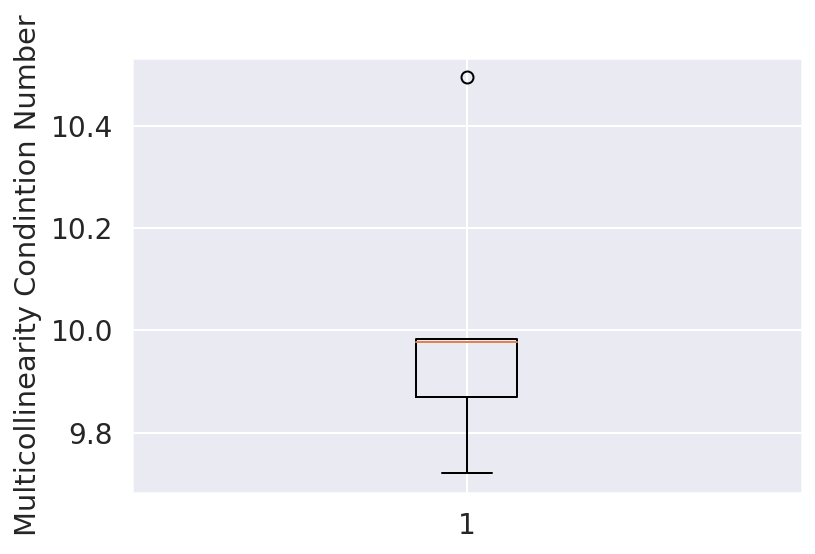

In [19]:
%config InlineBackend.figure_format = 'retina'
%pylab inline
f,ax=plt.subplots()
ax = setFont(ax, 'DejaVu Sans', fs1)
ax.boxplot(mc_day);
ax.set_ylabel('Multicollinearity Condintion Number')

# Figure Rev 7

In [3]:
dfTV_day = pd.read_pickle('../data_revision/results/df_res_day_new.pkl')
dfTV_night = pd.read_pickle('../data_revision/results/df_res_night_new.pkl')

In [4]:
############## Define Betas ##########################################
phases = [0,1,2,3,4]
betas_day = []
betas_night = []
for phase in phases:
    tmp = dfTV_day[dfTV_day['Phase']==phase].reset_index(drop=True)
    idx = np.where(tmp['R2_val_slm']==tmp['R2_val_slm'].max())[0][0]
    betas_day.append(tmp['SLM'][idx])
    
    tmp = dfTV_night[dfTV_night['Phase']==phase].reset_index(drop=True)
    idx = np.where(tmp['R2_val_slm']==tmp['R2_val_slm'].max())[0][0]
    betas_night.append(tmp['SLM'][idx])

In [5]:
betasDay = np.mean(betas_day, axis=0)
betasNight = np.mean(betas_night, axis=0)

In [6]:
def run_model_validation_otest(x_, betas):
    val = sm.add_constant(x_)
    return np.sum(val* betas.T, axis=1).reshape((-1, 1))


In [16]:
target_vars = ['hot_days', 'hot_nights']
predictor_vars = ['NDVI', 'dist_n']


phases = dfTest['phase'].unique()

for phase in phases[0:1]:
    c = list(dfTest[dfTest['phase']==phase]['UC_NM_MN'])
    gdf_test = gdf_all[gdf_all['city'].isin(c)].reset_index(drop=True)
    w_test = libpysal.weights.KNN.from_dataframe(gdf_test, k=8)
    w_test.transform = 'r'
    w_test = libpysal.weights.lag_spatial(w_test, gdf_test[target_vars[0]])
    x_test = gdf_test[predictor_vars].values
    constant = sm.add_constant(np.hstack((x_test,np.array(w_test).reshape(-1,1))))
    ytest_  = np.sum(constant * (betasDay.T), axis=1).reshape((-1, 1))
    
    ytest_ols = run_model_validation_otest(x_test, betasDay[:-1])
    
    print(r2_score(ytest_, gdf_test[target_vars[0]]))

0.6257626397028182


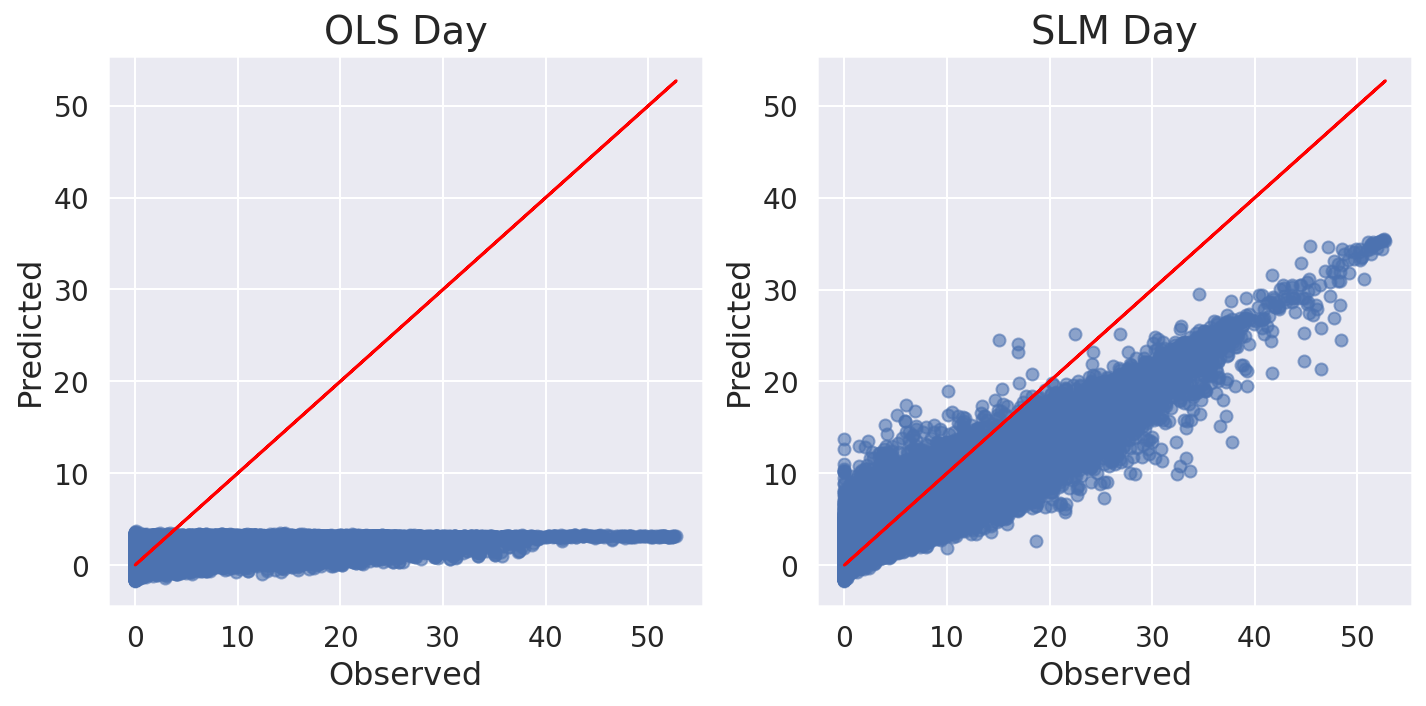

In [38]:
f,axs=plt.subplots(1,2, figsize=(10, 5))
ax=axs[0]
ax=setFont(ax,'Arial',fs1)
ax.scatter(gdf_test[target_var], ytest_ols, alpha=.6)
ax.plot(gdf_test[target_var], gdf_test[target_var], color='red')
ax.set_ylabel('Predicted', size=fs)
ax.set_xlabel('Observed', size=fs)
ax.set_title('OLS Day', size=fs*1.2)

ax=axs[1]
ax=setFont(ax,'Arial',fs1)
ax.scatter(gdf_test[target_var], ytest_, alpha=.6)
ax.plot(gdf_test[target_var], gdf_test[target_var], color='red')
ax.set_ylabel('Predicted', size=fs)
ax.set_xlabel('Observed', size=fs)
ax.set_title('SLM Day', size=fs*1.2)

f.tight_layout()

In [39]:
f.savefig('../figures_revision/residuls1.png', bbox_inches = 'tight')

In [24]:
diff = []
for i in range(0, len(ytest_)):
    dd = gdf_test[target_vars[0]][i]-ytest_[i]
    diff.append(dd[0])

Text(0.5, 1.0, 'Distribution of the residuals for the SLM')

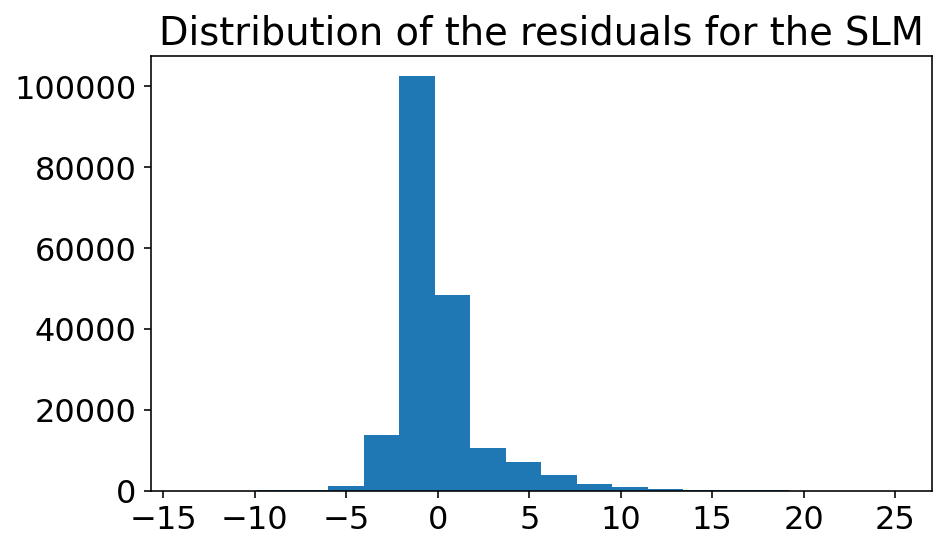

In [27]:
f,ax=plt.subplots(figsize=(7,4))
ax=setFont(ax,'Arial',16)
plt.hist(diff,20);
ax.set_title('Distribution of the residuals for the SLM', size=fs*1.2)

In [28]:
f.savefig('../figures_revision/residuls2.png', bbox_inches = 'tight')

In [42]:
len(ytest_)/2

95265.5

In [66]:
##################################################
yy = gdf_test[target_vars[0]]

lm = sm.OLS(yy, ytest_).fit()
influence = lm.get_influence()
pd.Series(influence.hat_matrix_diag).describe()

count    1.905310e+05
mean     5.248490e-06
std      1.325296e-05
min      2.243869e-16
25%      1.749982e-07
50%      7.731051e-07
75%      3.537196e-06
max      2.754457e-04
dtype: float64

In [67]:
influence = lm.get_influence()
inf_sum = influence.summary_frame()
print(inf_sum.head())

     dfb_x1       cooks_d  standard_resid      hat_diag  dffits_internal  \
0 -0.000031  9.771147e-10        0.226763  1.900203e-08         0.000031   
1 -0.000143  2.051617e-08        0.481861  8.835956e-08         0.000143   
2  0.000012  1.436765e-10        0.082462  2.112910e-08         0.000012   
3 -0.000009  8.305890e-11       -0.109446  6.934058e-09        -0.000009   
4 -0.000054  2.920749e-09       -0.266518  4.111890e-08        -0.000054   

   student_resid    dffits  
0       0.226763  0.000031  
1       0.481860  0.000143  
2       0.082462  0.000012  
3      -0.109446 -0.000009  
4      -0.266517 -0.000054  


In [68]:
student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag



Leverage vs. Studentized Residuals


Text(0.5, 0, 'Leverage')

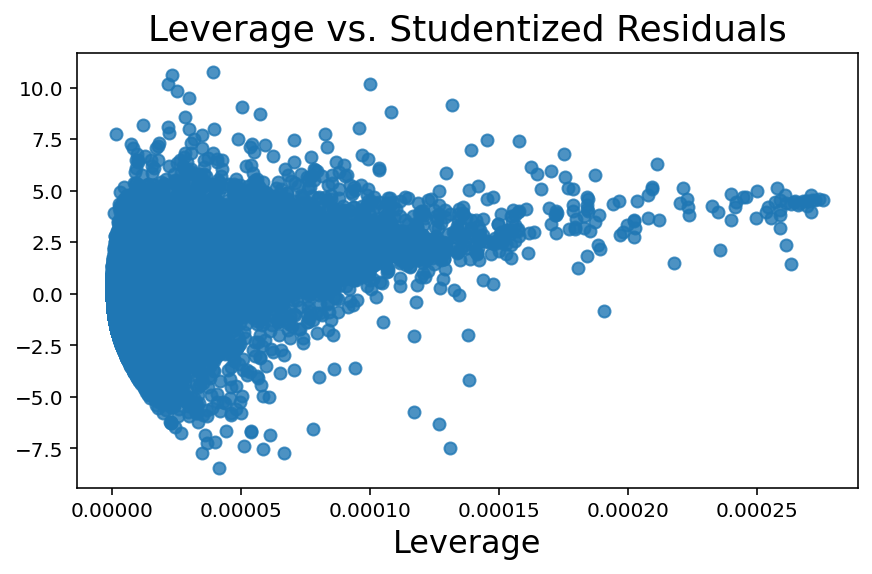

In [69]:
import seaborn as sns
print ('\n')
print ('Leverage vs. Studentized Residuals')
f,ax=plt.subplots(figsize=(7,4))
sns.regplot(leverage, lm.resid_pearson,  fit_reg=False, ax=ax)

plt.title('Leverage vs. Studentized Residuals',size=18)
plt.xlabel('Leverage', size=16)

In [70]:
f.savefig('../figures_revision/residuals4.png', bbox_inches = 'tight')

In [71]:
from statsmodels.formula.api import ols

MEDVres = pd.concat([gdf_test.hot_days, inf_sum], axis = 1)
MEDVres=MEDVres.rename(columns={'hat_diag': 'leverage'})
MEDVres.head()

,hot_days,dfb_x1,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
0,0.090909,-0.000031,9.771147e-10,0.226763,1.900203e-08,0.000031,0.226763,0.000031
1,0.181818,-0.000143,2.051617e-08,0.481861,8.835956e-08,0.000143,0.481860,0.000143
2,0.545455,0.000012,1.436765e-10,0.082462,2.112910e-08,0.000012,0.082462,0.000012
3,0.000000,-0.000009,8.305890e-11,-0.109446,6.934058e-09,-0.000009,-0.109446,-0.000009
4,0.000000,-0.000054,2.920749e-09,-0.266518,4.111890e-08,-0.000054,-0.266517,-0.000054


In [72]:
r = MEDVres.student_resid
print ('-'*30 + ' studentized residual ' + '-'*30)
print (r.describe())
print ('\n')

r_sort = MEDVres.sort_values(by = 'student_resid')
print ('-'*30 + ' top 5 most negative residuals ' + '-'*30)
print (r_sort.head())
print ('\n')

print ('-'*30 + ' top 5 most positive residuals ' + '-'*30)
print (r_sort.tail())

------------------------------ studentized residual ------------------------------
count    190531.000000
mean         -0.366029
std           0.930630
min          -8.441609
25%          -0.804915
50%          -0.435727
75%          -0.021196
max          10.741076
Name: student_resid, dtype: float64


------------------------------ top 5 most negative residuals ------------------------------
         hot_days    dfb_x1   cooks_d  standard_resid  leverage  \
188546   0.000000 -0.054208  0.002937       -8.440053  0.000041   
123362   0.000000 -0.045452  0.002065       -7.728535  0.000035   
62931    6.000000 -0.062919  0.003958       -7.712325  0.000067   
141424   5.090909 -0.057429  0.003297       -7.504175  0.000059   
125352  15.090909 -0.085495  0.007307       -7.470988  0.000131   

        dffits_internal  student_resid    dffits  
188546        -0.054198      -8.441609 -0.054208  
123362        -0.045445      -7.729727 -0.045452  
62931         -0.062910      -7.713509 -0.06291

In [73]:
print (MEDVres.hot_days[abs(r) > 2])


20086      0.454545
20087      0.909091
20089      1.727273
20233      0.636364
20630      0.000000
            ...    
190429    14.272727
190445    21.545455
190446    21.545455
190447    11.181818
190515    11.090909
Name: hot_days, Length: 9306, dtype: float64


In [74]:
1459/len(MEDVres)*100

0.7657546540982831

# Figure Rev 8

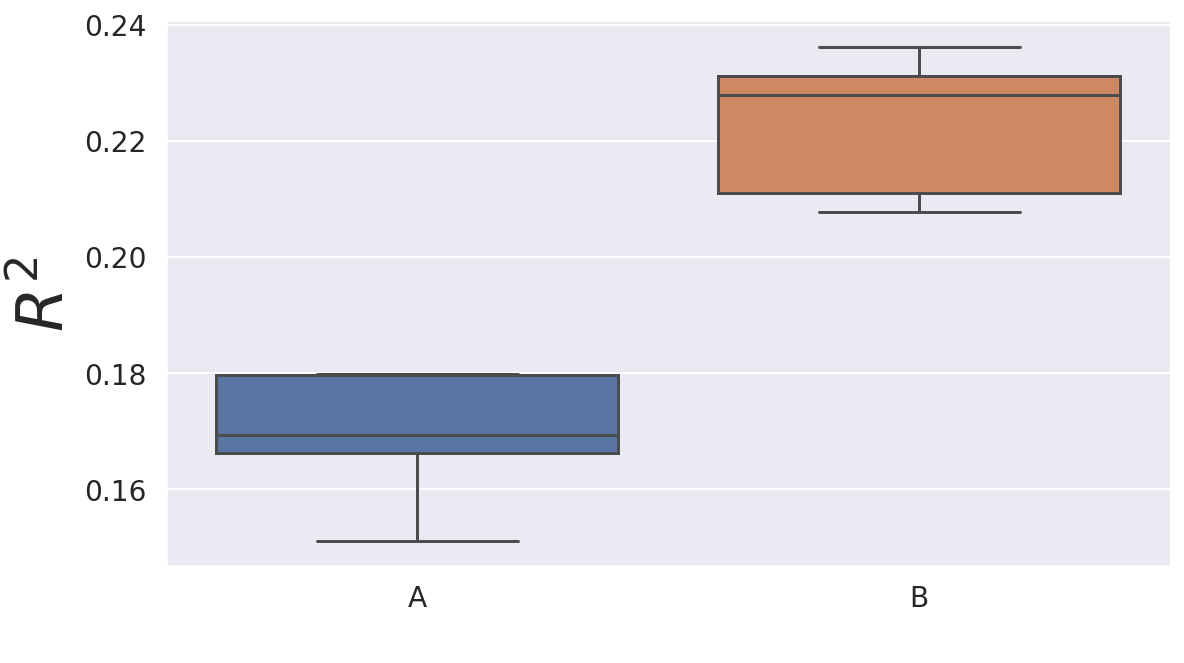

In [98]:
import seaborn as sns

df = pd.DataFrame()
df['A'] = R2_original
df['B'] = R2_modified

f,ax=plt.subplots(figsize=(9,5))
ax = setFont(ax, 'DejaVu Sans', fs1)
sns.boxplot(x="variable", y="value", data=pd.melt(df));
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_ylabel(r'$R^2$', size=fs*2)
ax.set_xlabel(' ');

In [2]:
dfTV_day = pd.read_pickle('../data_revision/results/df_res_day_new.pkl')
dfTV_night = pd.read_pickle('../data_revision/results/df_res_night_new.pkl')

In [3]:
############## Define Betas ##########################################
phases = [0,1,2,3,4]
betas_day = []
betas_night = []
for phase in phases:
    tmp = dfTV_day[dfTV_day['Phase']==phase].reset_index(drop=True)
    idx = np.where(tmp['R2_val_slm']==tmp['R2_val_slm'].max())[0][0]
    betas_day.append(tmp['SLM'][idx])
    
    tmp = dfTV_night[dfTV_night['Phase']==phase].reset_index(drop=True)
    idx = np.where(tmp['R2_val_slm']==tmp['R2_val_slm'].max())[0][0]
    betas_night.append(tmp['SLM'][idx])
    

In [4]:
betasDay = np.mean(betas_day, axis=0)
betasNight = np.mean(betas_night, axis=0)

In [6]:
######### Load datasets for cross validation
dfTV = pd.read_pickle('../data_revision/cities/cv/df_train_val.pkl')
dfTest = pd.read_pickle('../data_revision/cities/cv/df_test.pkl')

In [7]:
idx = np.arange(0,200)
gdf_all = pd.DataFrame()
for ii in idx:
    gdf = gpd.read_file('../data_revision/GEE_dataframes/gdf_%d.shp'%ii)
    gdf =  gdf.set_crs('epsg:4326')
    gdf = gdf.to_crs("ESRI:54009")
    gdf['dist'] = -gdf['dist']
    gdf = gdf[gdf['dist']>0]
    gdf['dist_n'] = 1/(gdf['dist']**2)
    gdf['dist_n'] = norm01(gdf, 'dist_n')
    gdf = gdf[gdf['NDVI']>=-1]
    gdf = gdf[gdf['NDBI']>=-1].reset_index(drop=True)
    gdf['hot_days']=gdf['hot_days']/11
    gdf['hot_nights']=gdf['hot_nights']/11
    gdf_all = gdf_all.append(gdf, ignore_index=True)